<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,32.615887,32.899080,49.438727,24.961564,0.000053,149.915311,149.915374,-0.000063
1,0.0,1.0,25.468658,74.271859,22.772210,89.040261,-0.000032,221.552957,221.553156,-0.000199
2,0.0,2.0,35.210054,76.828028,55.708568,75.211754,0.000163,252.958567,252.958471,0.000096
3,0.0,3.0,44.060112,37.602518,47.943834,34.302976,-0.001069,173.908371,173.909547,-0.001176
4,0.0,4.0,68.059882,67.346541,28.196094,46.023028,-0.000281,219.625263,219.625629,-0.000366
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.808865,71.496224,33.031914,20.596863,-0.000393,185.933474,185.933948,-0.000474
249996,999.0,246.0,33.040527,63.252949,97.837435,32.904232,0.000424,237.035567,237.035370,0.000198
249997,999.0,247.0,26.920766,42.991838,51.768091,82.382967,-0.000385,214.063277,214.063729,-0.000451
249998,999.0,248.0,36.014375,28.555095,63.258766,73.784757,-0.000383,211.612610,211.613105,-0.000495


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,32.615887,32.899080,49.438727,24.961564,0.000053,149.915311,149.915374,-0.000063
1,0.0,1.0,25.468658,74.271859,22.772210,89.040261,-0.000032,221.552957,221.553156,-0.000199
2,0.0,2.0,35.210054,76.828028,55.708568,75.211754,0.000163,252.958567,252.958471,0.000096
3,0.0,3.0,44.060112,37.602518,47.943834,34.302976,-0.001069,173.908371,173.909547,-0.001176
4,0.0,4.0,68.059882,67.346541,28.196094,46.023028,-0.000281,219.625263,219.625629,-0.000366
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.808865,71.496224,33.031914,20.596863,-0.000393,185.933474,185.933948,-0.000474
249996,999.0,246.0,33.040527,63.252949,97.837435,32.904232,0.000424,237.035567,237.035370,0.000198
249997,999.0,247.0,26.920766,42.991838,51.768091,82.382967,-0.000385,214.063277,214.063729,-0.000451
249998,999.0,248.0,36.014375,28.555095,63.258766,73.784757,-0.000383,211.612610,211.613105,-0.000495


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    32.615887  32.899080  49.438727  24.961564  0.000053  149.915311   
      1.0    25.468658  74.271859  22.772210  89.040261 -0.000032  221.552957   
      2.0    35.210054  76.828028  55.708568  75.211754  0.000163  252.958567   
      3.0    44.060112  37.602518  47.943834  34.302976 -0.001069  173.908371   
      4.0    68.059882  67.346541  28.196094  46.023028 -0.000281  219.625263   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  50.808865  71.496224  33.031914  20.596863 -0.000393  185.933474   
      246.0  33.040527  63.252949  97.837435  32.904232  0.000424  237.035567   
      247.0  26.920766  42.991838  51.768091  82.382967 -0.000385  214.063277   
      248.0  36.014375  28.555095  63.258766  73.784757 -0.000383  211.612610   
      249.0  39.304610  66.671020  30.075037  86.007927  0.000095  232.058688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.915374 -0.000063  
      1.0    221.553156 -0.000199  
      2.0    252.958471  0.000096  
      3.0    173.909547 -0.001176  
      4.0    219.625629 -0.000366  
...                 ...       ...  
999.0 245.0  185.933948 -0.000474  
      246.0  237.035370  0.000198  
      247.0  214.063729 -0.000451  
      248.0  211.613105 -0.000495  
      249.0  232.058550  0.000138  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    32.615887  32.899080  49.438727  24.961564  0.000053  149.915311   
      1.0    25.468658  74.271859  22.772210  89.040261 -0.000032  221.552957   
      2.0    35.210054  76.828028  55.708568  75.211754  0.000163  252.958567   
      3.0    44.060112  37.602518  47.943834  34.302976 -0.001069  173.908371   
      4.0    68.059882  67.346541  28.196094  46.023028 -0.000281  219.625263   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  50.808865  71.496224  33.031914  20.596863 -0.000393  185.933474   
      246.0  33.040527  63.252949  97.837435  32.904232  0.000424  237.035567   
      247.0  26.920766  42.991838  51.768091  82.382967 -0.000385  214.063277   
      248.0  36.014375  28.555095  63.258766  73.784757 -0.000383  211.612610   
      249.0  39.304610  66.671020  30.075037  86.007927  0.000095  232.058688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.915374 -0.000063  
      1.0    221.553156 -0.000199  
      2.0    252.958471  0.000096  
      3.0    173.909547 -0.001176  
      4.0    219.625629 -0.000366  
...                 ...       ...  
999.0 245.0  185.933948 -0.000474  
      246.0  237.035370  0.000198  
      247.0  214.063729 -0.000451  
      248.0  211.613105 -0.000495  
      249.0  232.058550  0.000138  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,32.615887,32.899080,49.438727,24.961564,0.000053,149.915311,149.915374,-0.000063
1,0.0,1.0,25.468658,74.271859,22.772210,89.040261,-0.000032,221.552957,221.553156,-0.000199
2,0.0,2.0,35.210054,76.828028,55.708568,75.211754,0.000163,252.958567,252.958471,0.000096
3,0.0,3.0,44.060112,37.602518,47.943834,34.302976,-0.001069,173.908371,173.909547,-0.001176
4,0.0,4.0,68.059882,67.346541,28.196094,46.023028,-0.000281,219.625263,219.625629,-0.000366
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.808865,71.496224,33.031914,20.596863,-0.000393,185.933474,185.933948,-0.000474
249996,999.0,246.0,33.040527,63.252949,97.837435,32.904232,0.000424,237.035567,237.035370,0.000198
249997,999.0,247.0,26.920766,42.991838,51.768091,82.382967,-0.000385,214.063277,214.063729,-0.000451
249998,999.0,248.0,36.014375,28.555095,63.258766,73.784757,-0.000383,211.612610,211.613105,-0.000495


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    32.615887  32.899080  49.438727  24.961564  0.000053  149.915311   
      1.0    25.468658  74.271859  22.772210  89.040261 -0.000032  221.552957   
      2.0    35.210054  76.828028  55.708568  75.211754  0.000163  252.958567   
      3.0    44.060112  37.602518  47.943834  34.302976 -0.001069  173.908371   
      4.0    68.059882  67.346541  28.196094  46.023028 -0.000281  219.625263   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  50.808865  71.496224  33.031914  20.596863 -0.000393  185.933474   
      246.0  33.040527  63.252949  97.837435  32.904232  0.000424  237.035567   
      247.0  26.920766  42.991838  51.768091  82.382967 -0.000385  214.063277   
      248.0  36.014375  28.555095  63.258766  73.784757 -0.000383  211.612610   
      249.0  39.304610  66.671020  30.075037  86.007927  0.000095  232.058688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.915374 -0.000063  
      1.0    221.553156 -0.000199  
      2.0    252.958471  0.000096  
      3.0    173.909547 -0.001176  
      4.0    219.625629 -0.000366  
...                 ...       ...  
999.0 245.0  185.933948 -0.000474  
      246.0  237.035370  0.000198  
      247.0  214.063729 -0.000451  
      248.0  211.613105 -0.000495  
      249.0  232.058550  0.000138  

[250000 rows x 8 columns]

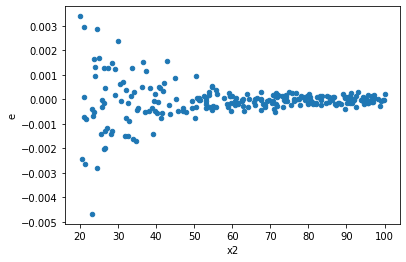

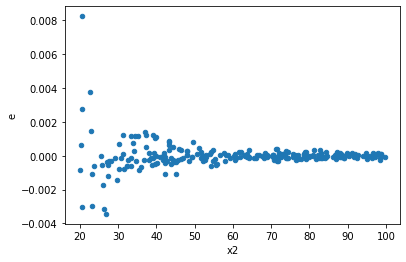

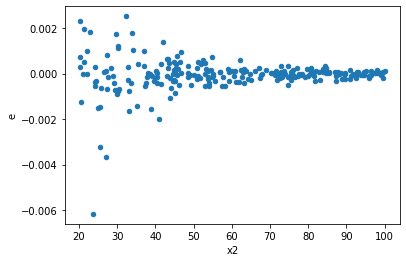

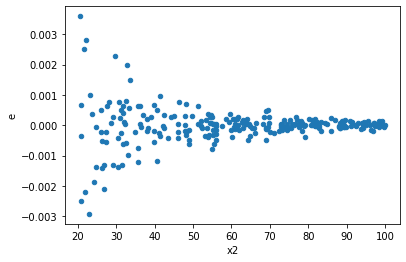

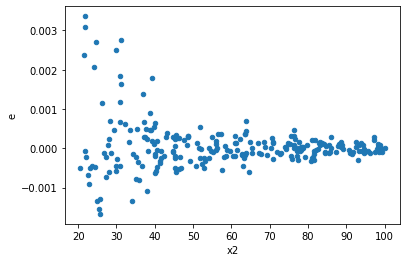

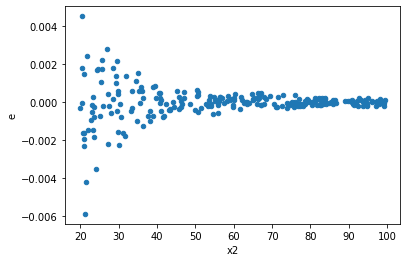

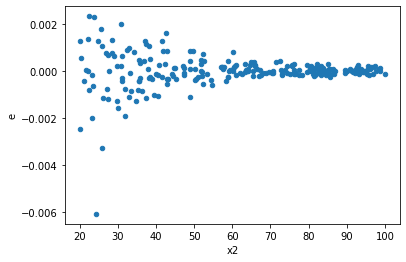

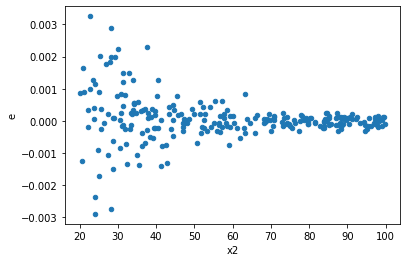

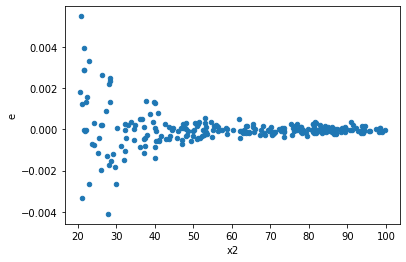

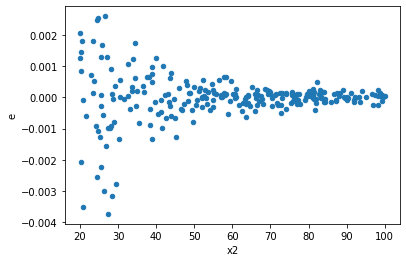

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
45.0,96.0,96.0,4.7397249424272516e-05,6.0153976131985814e-05,4.937213481695053e-07,6.266039180415189e-07,1.2691448736512647,0.24473533319582286,0.8776323334020886,0.12236766659791143,Reject005=1 : Homoscedasticity
194.0,96.0,96.0,4.6386271988843326e-05,6.723181805145514e-05,4.83190333217118e-07,7.003314380359911e-07,1.449390415932229,0.07055317025431385,0.9647234148728431,0.03527658512715692,Reject005=1 : Homoscedasticity
995.0,96.0,96.0,6.904129302344572e-05,7.119392970882704e-05,7.19180135660893e-07,7.416034344669483e-07,1.0311789740764312,0.8807502704012782,0.5596248647993609,0.4403751352006391,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,5.857164697895801e-05,1.1216001710823038e-05,6.101213226974793e-07,1.1683335115440664e-07,0.1914919980797605,1.6232763549305632e-14,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,5.643917499842629e-05,9.423181881758406e-06,5.879080729002739e-07,9.815814460165006e-08,0.16696172263363443,1.5810840586128148e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,8.996274365196068e-05,2.571277699913627e-05,9.371119130412571e-07,2.678414270743361e-07,0.28581583837206453,2.920591028356086e-09,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,6.627397228980378e-05,5.7179596125054765e-05,6.903538780187894e-07,5.956207929693205e-07,0.8627760514341739,0.4709813029144892,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,5.76611117074007e-05,1.440011007131719e-05,6.006365802854239e-07,1.5000114657622073e-07,0.2497369482640232,6.415084578931969e-11,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,6.77764477507348e-05,8.340881605724402e-06,7.060046640701542e-07,8.688418339296253e-08,0.1230646025651879,2.516134093243357e-21,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,4.9982332224062554e-05,6.125387865277572e-06,5.206492940006516e-07,6.380612359664137e-08,0.12255106139942545,2.1487841626895002e-21,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,6.561767446823749e-05,3.70322645668149e-05,6.835174423774738e-07,3.8575275590432187e-07,0.5643641727160039,0.005494171090017975,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,4.744254002954014e-05,2.9413196222083047e-05,4.941931253077098e-07,3.063874606466984e-07,0.6199751573960605,0.020069864951233807,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    969
Reject005=1 : Homoscedasticity       31
Name: Result_test, dtype: int64